In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('customer_data.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Handling missing values

In [7]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

<Axes: >

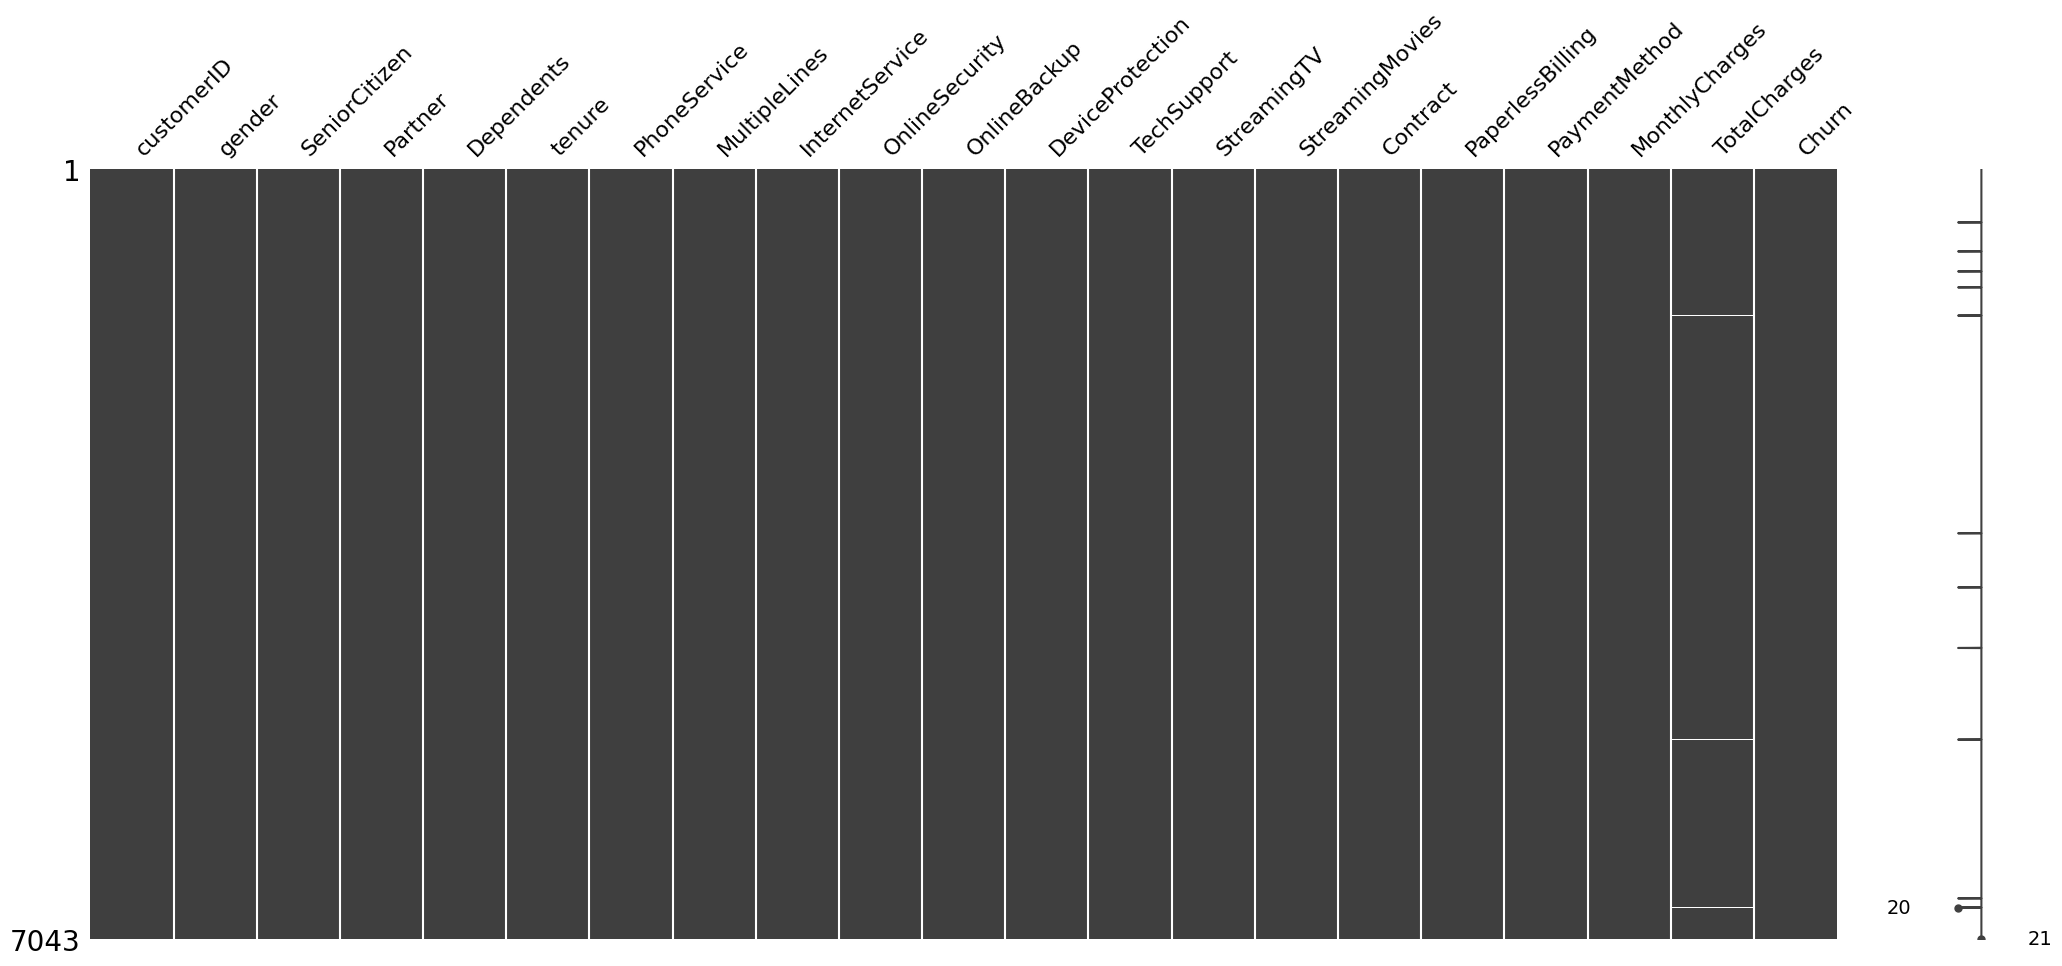

In [9]:
msno.matrix(df)

In [10]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### changinge the target column to numerical value 

In [13]:
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

# Exploratory Dta Analysis

## Univariate Analysis: Distribution of numerical & categorical features.

### numerical features

In [14]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928,0.265370
std,0.368612,24.559481,30.090047,2265.270398,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,402.225000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [15]:
num_col = df.dtypes[df.dtypes != 'object'].index

In [16]:
num_col

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

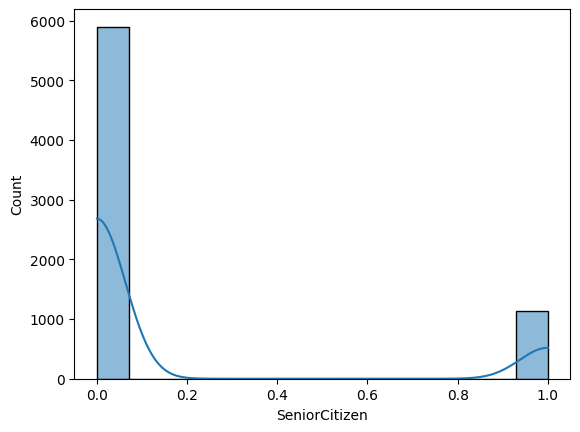

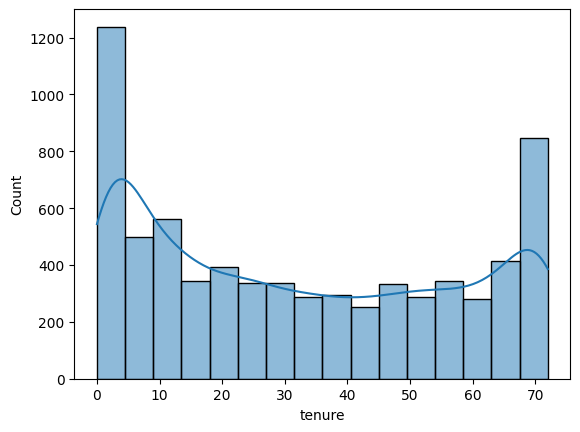

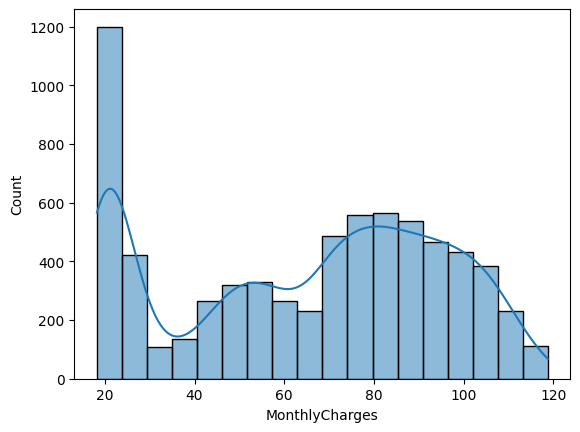

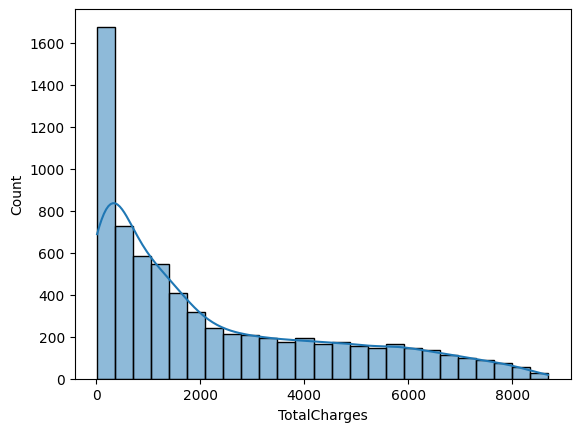

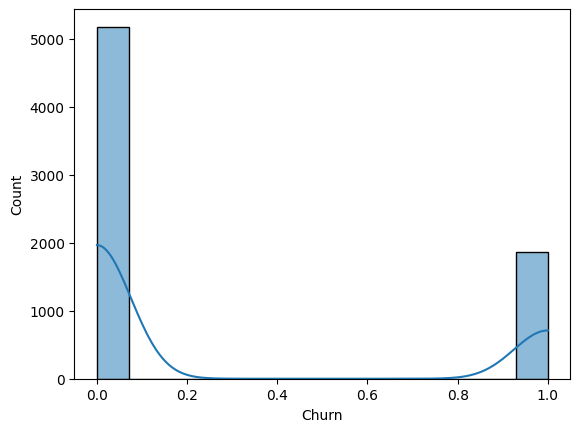

In [17]:
for i in num_col:
    sns.histplot(x=df[i],kde=True)
    plt.show()

### categorical feature

In [18]:
cat_col = df.dtypes[df.dtypes == 'object'].index

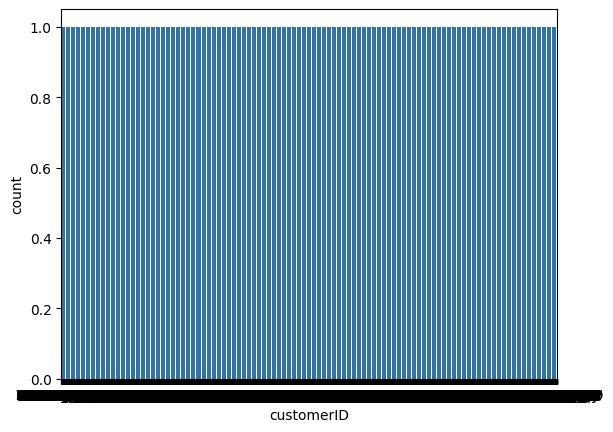

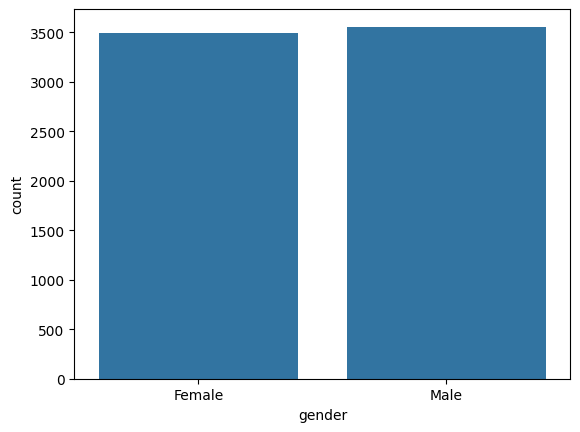

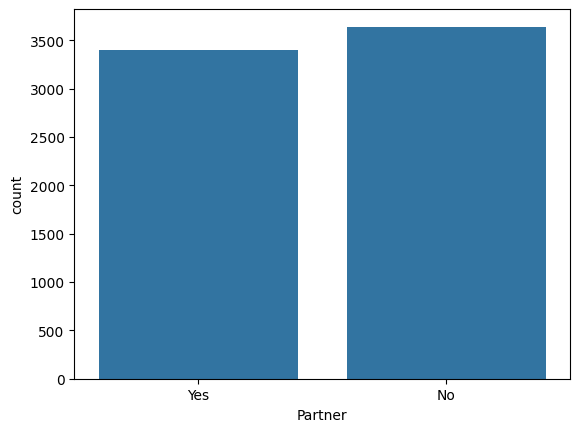

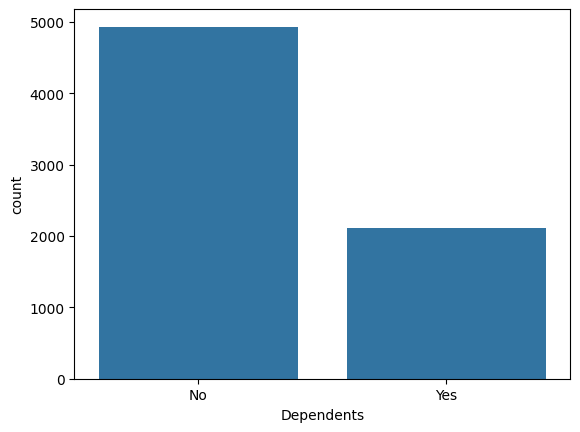

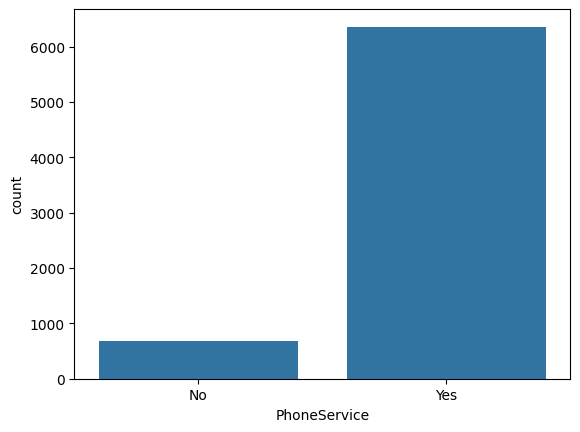

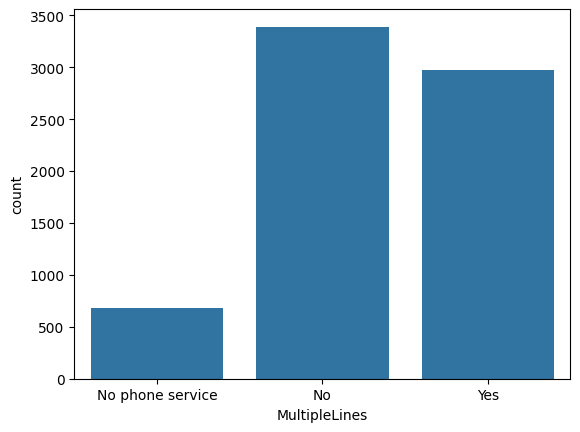

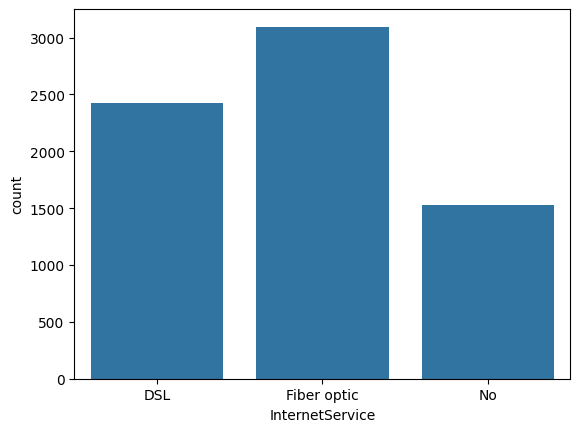

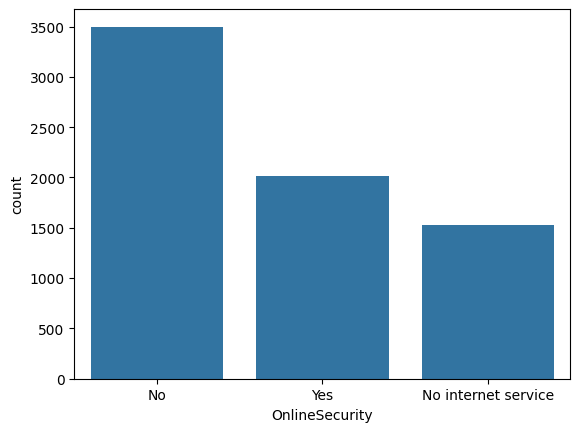

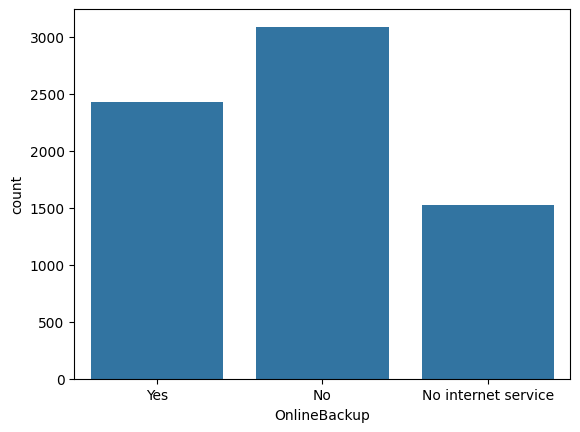

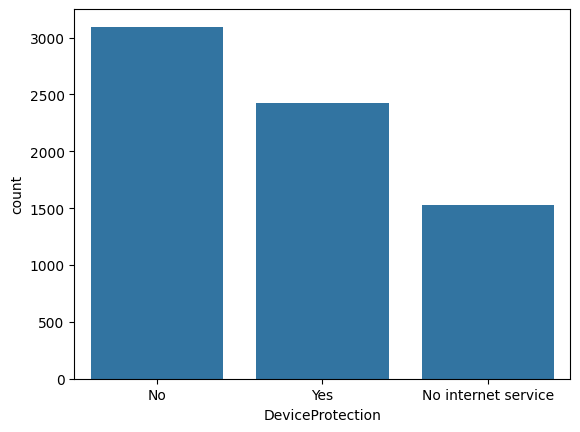

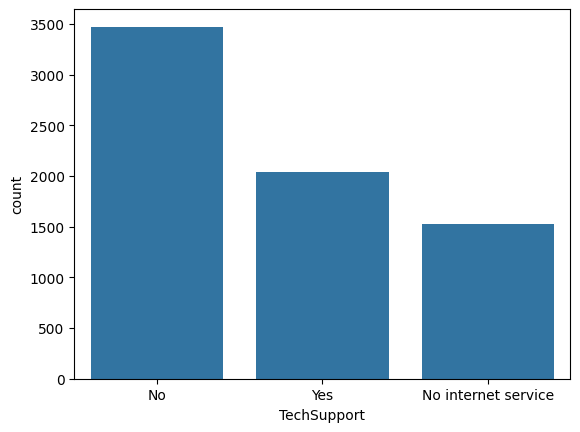

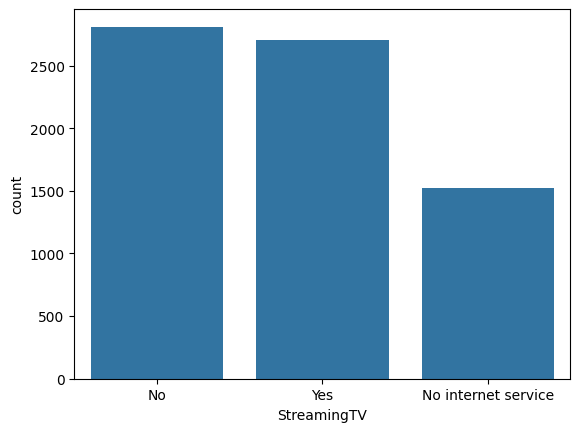

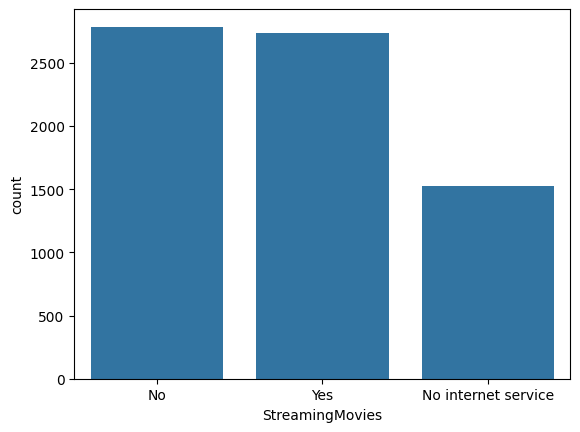

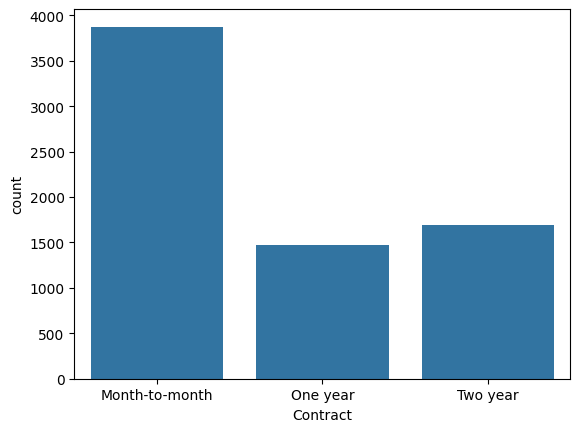

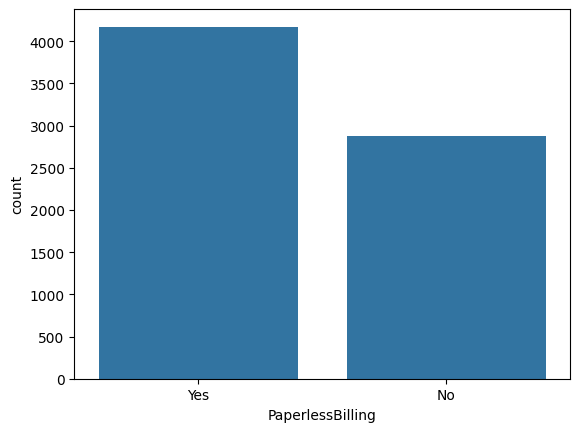

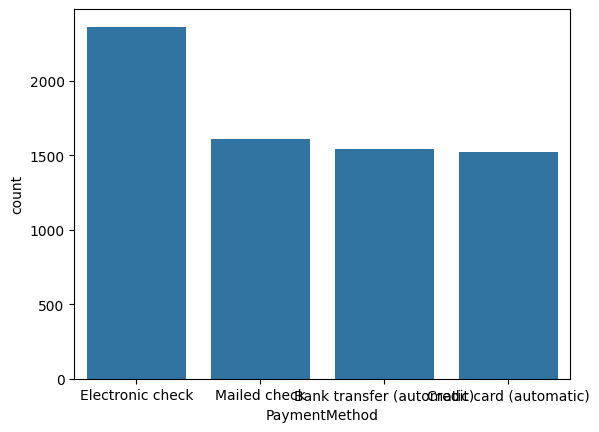

In [19]:
for i in cat_col:
    sns.countplot(x=df[i])
    plt.show()

## Bivariate Analysis: Relationship with churn

### for numerical columns

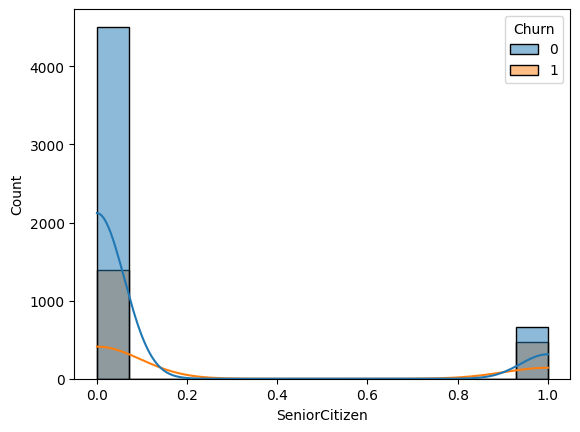

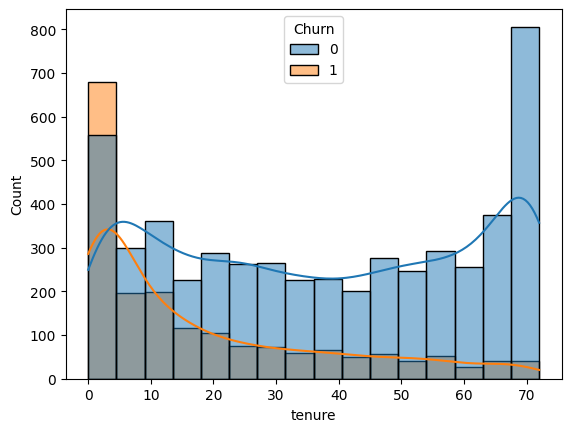

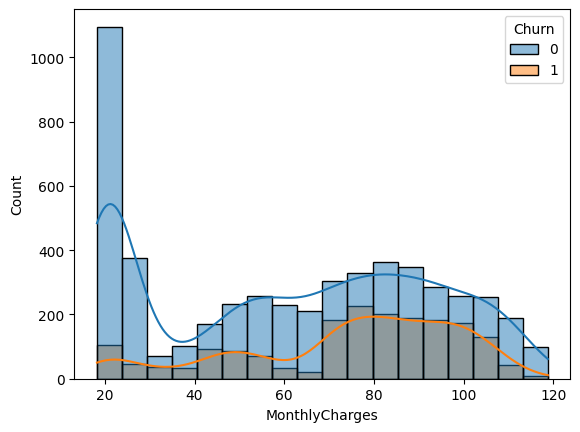

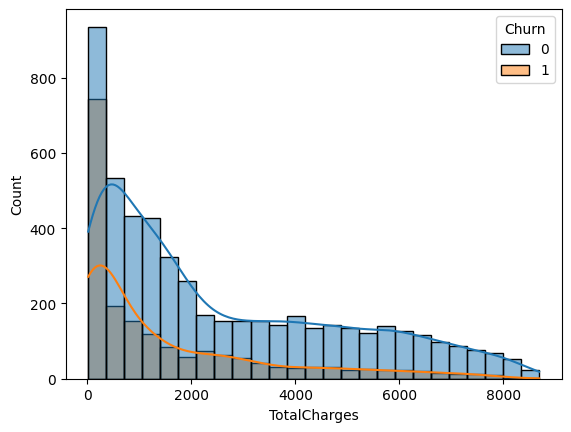

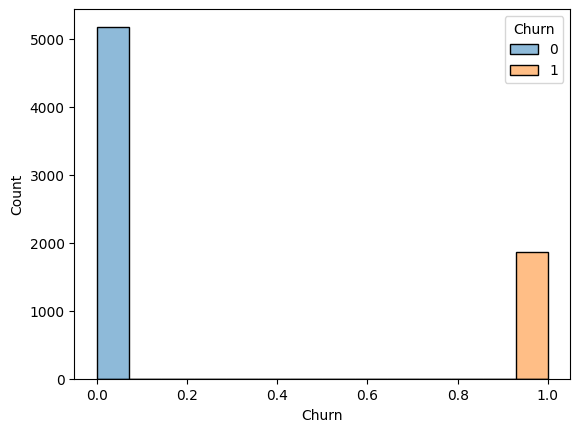

In [20]:
for i in num_col:
    sns.histplot(x=df[i],hue=df['Churn'],kde=True)
    plt.show()

### for categorical values

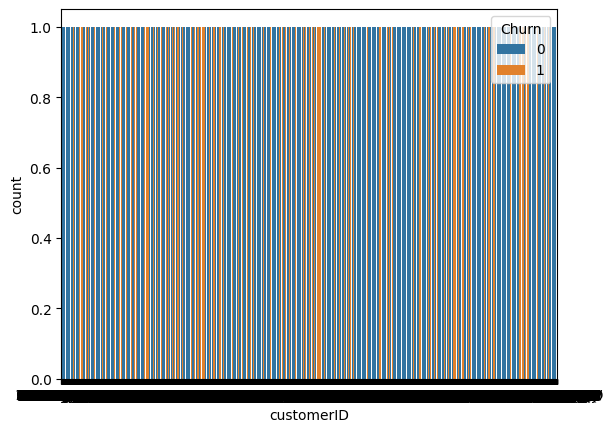

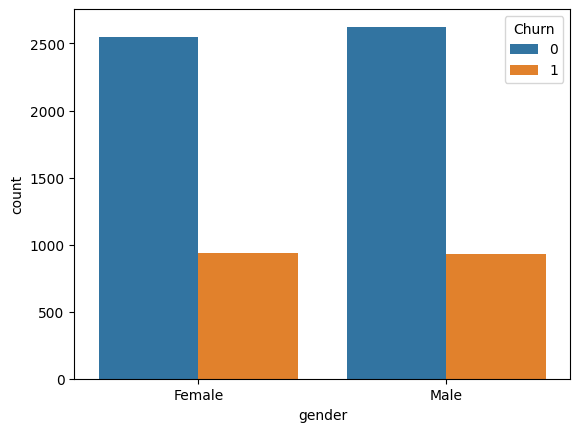

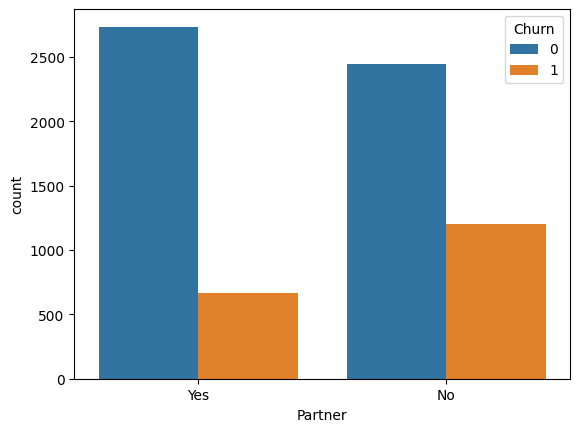

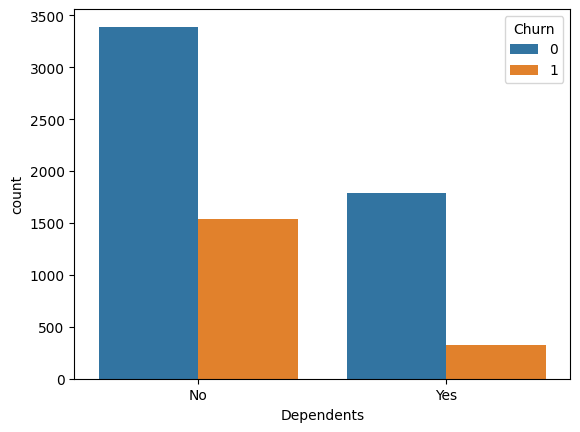

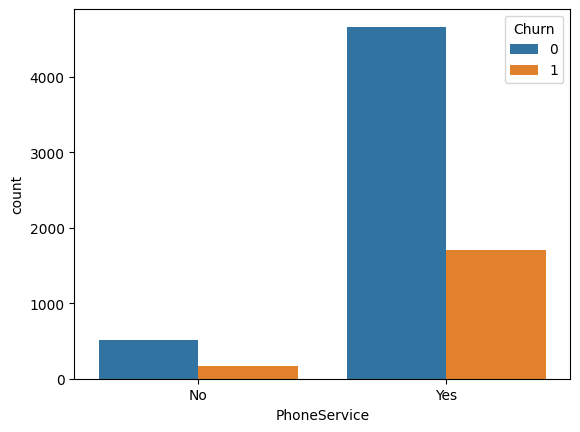

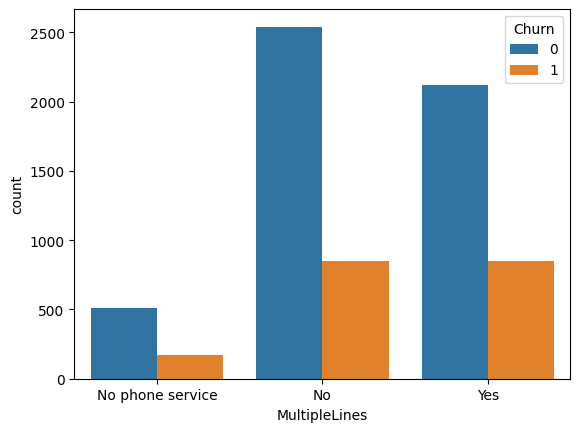

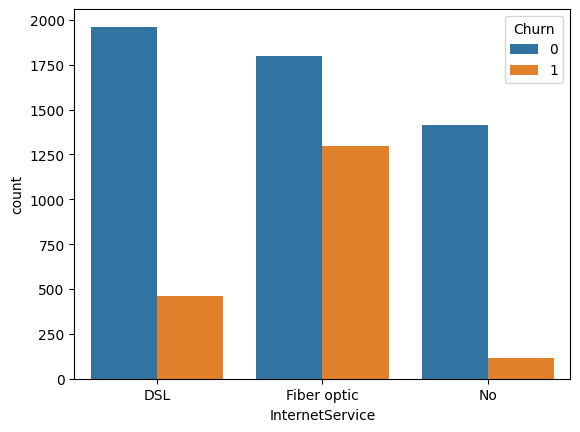

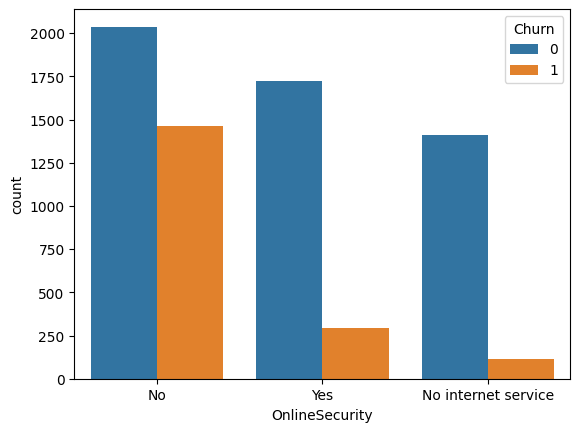

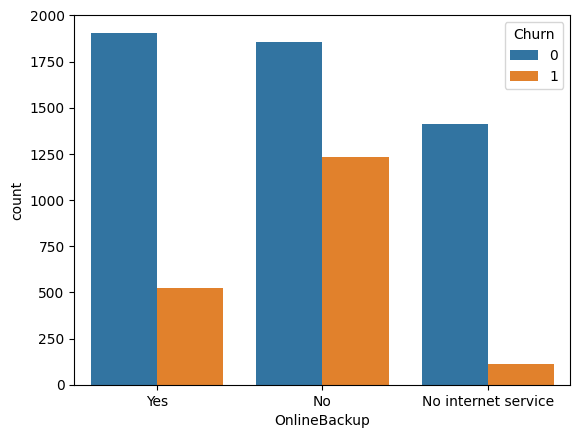

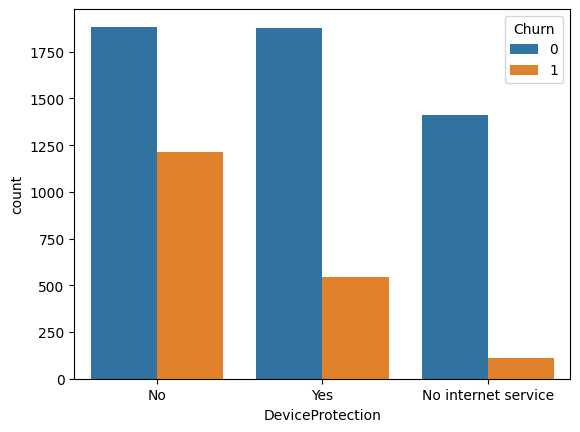

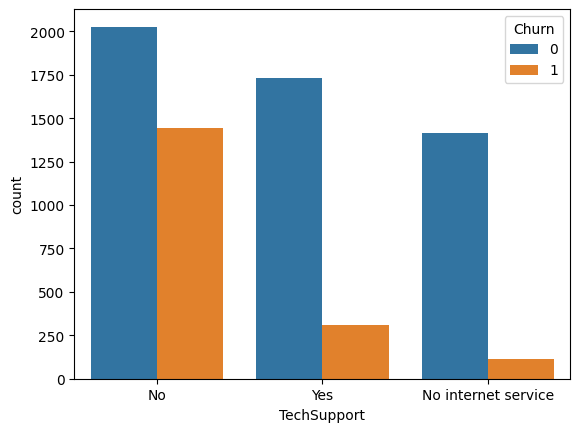

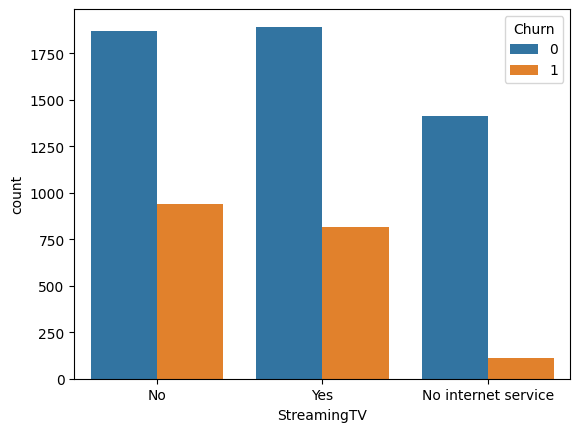

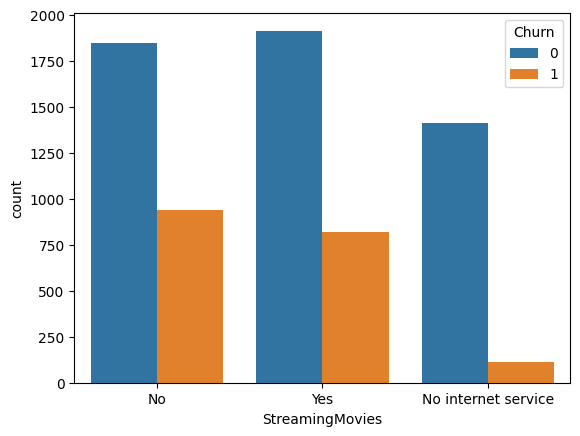

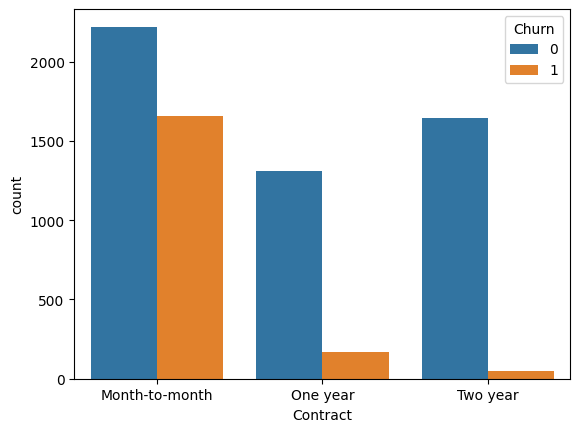

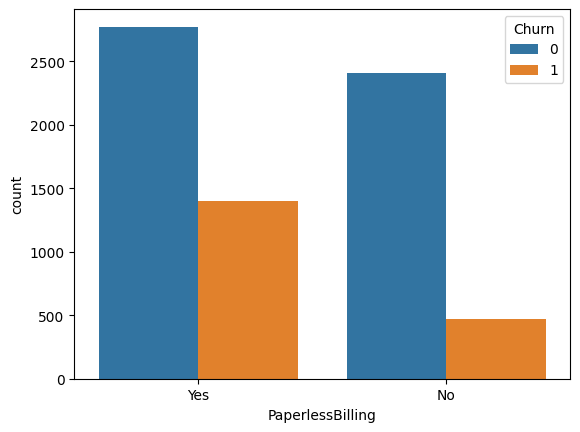

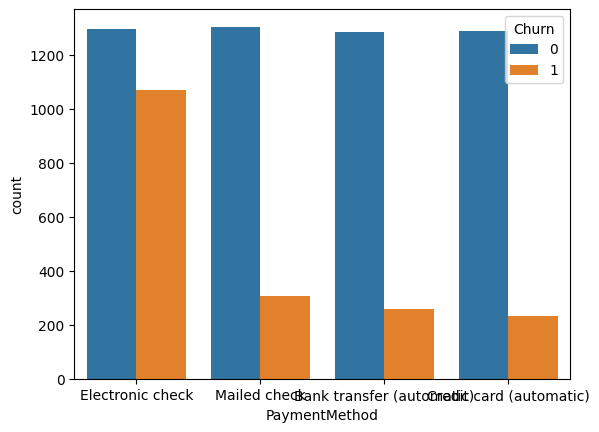

In [21]:
for i in cat_col:
    sns.countplot(x=df[i],hue=df['Churn'])
    plt.show()

# multivariate analysis

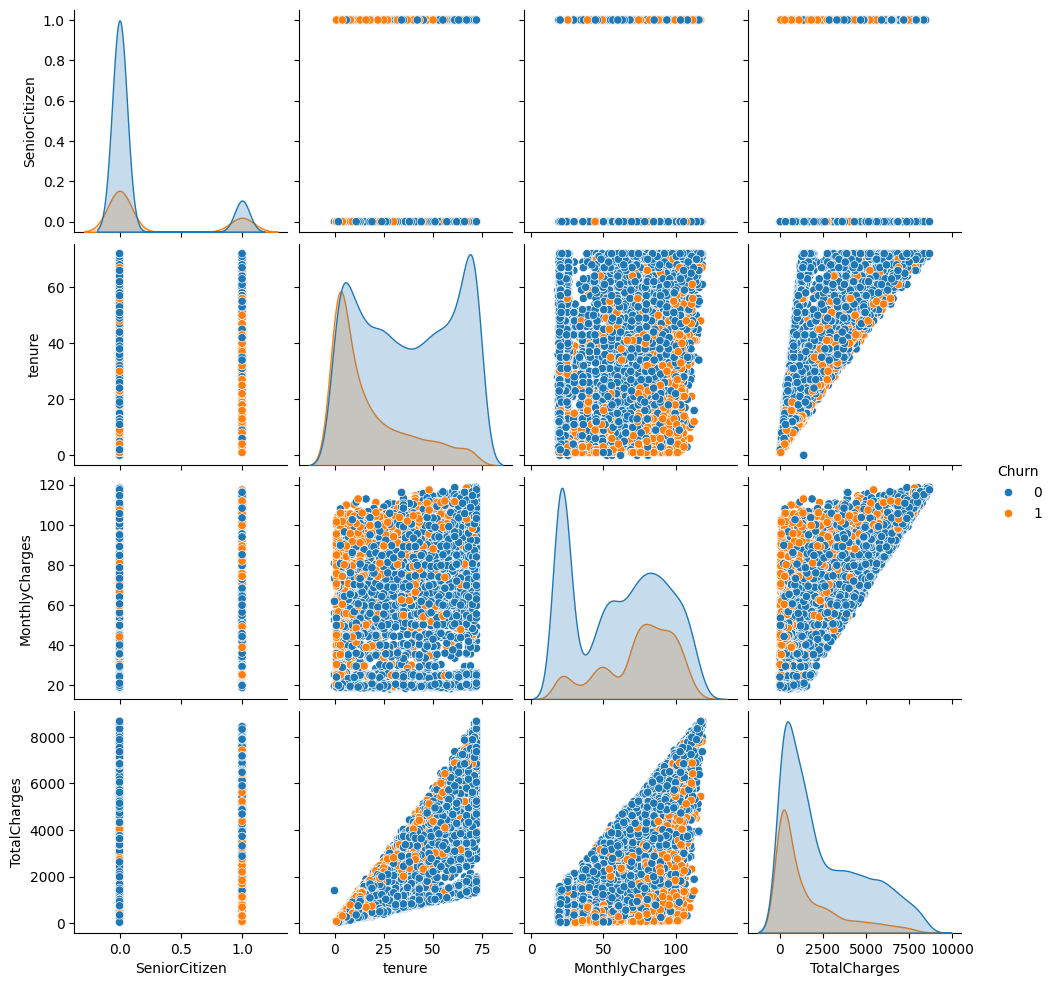

In [22]:
sns.pairplot(df,hue='Churn')
plt.show()

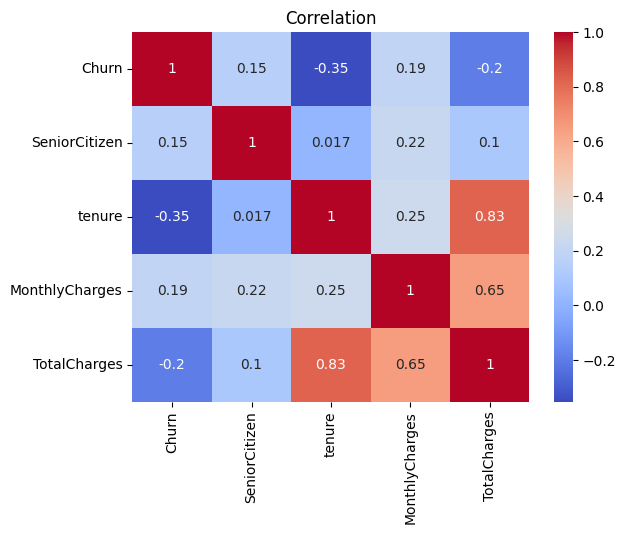

In [23]:
c = df[['Churn','SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(c,annot=True,cmap='coolwarm')
plt.title('Correlation')
plt.show()

In [24]:
num_col

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

# Outlier detection

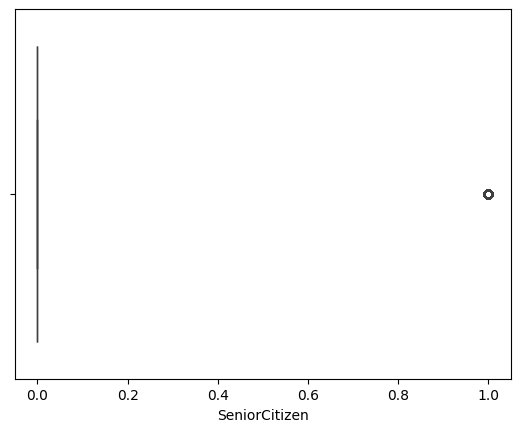

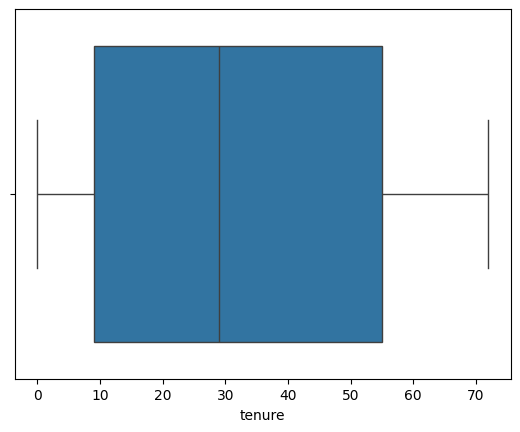

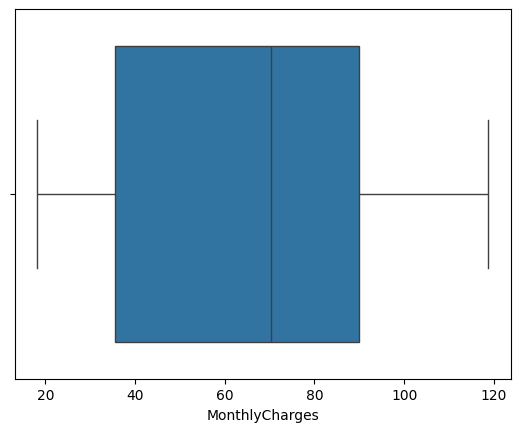

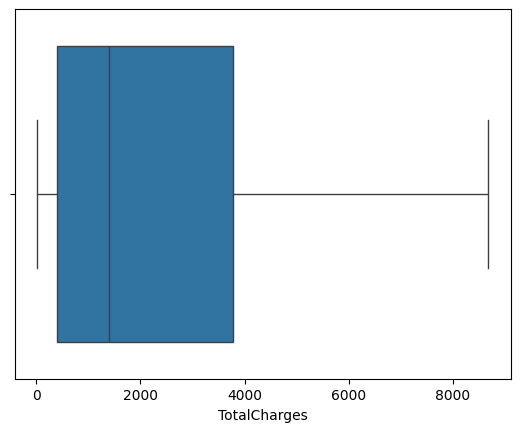

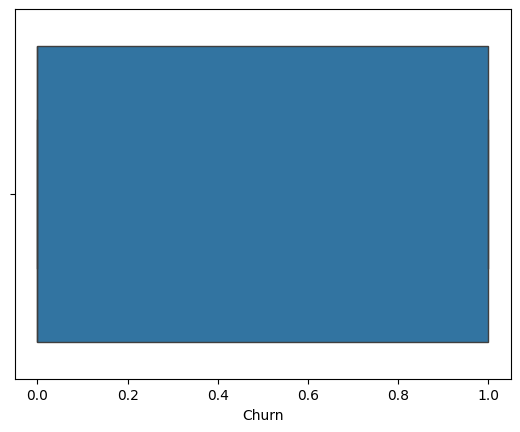

In [25]:
for i in num_col:
    sns.boxplot(x=df[i])
    plt.show()

In [26]:
df['SeniorCitizen'].describe(percentiles=[0.01,0.05,0.07,0.25,0.50,0.75,0.95,0.99])

count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
1%          0.000000
5%          0.000000
7%          0.000000
25%         0.000000
50%         0.000000
75%         0.000000
95%         1.000000
99%         1.000000
max         1.000000
Name: SeniorCitizen, dtype: float64

# Feature Engineering

In [27]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [28]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [29]:
bn_col = ['gender', 'Partner', 'Dependents', 'PhoneService','PaperlessBilling']

In [30]:
df[bn_col] = df[bn_col].apply(lambda x: x.map({'Yes':1,'No':0,'Male':1,'Female':0}))

In [31]:
df['MultipleLines'].value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [32]:
### create a new column as no phone service

In [33]:
df['NoPhoneService'] = df['MultipleLines'].apply(lambda x: 1 if x == 'No phone service' else 0)

In [34]:
### replacing no phone service to no

In [35]:
df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': 'No'})

In [36]:
df['MultipleLines'] = df['MultipleLines'].map({'Yes': 1,'No':0})

In [37]:
df['MultipleLines'].value_counts()

MultipleLines
0    4072
1    2971
Name: count, dtype: int64

In [38]:
internet = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

In [39]:
for i in internet:
    df[i] = df[i].replace('No internet service', 'No')
    df[i] = df[i].map({'Yes': 1,'No': 0})

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [41]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [42]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [43]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [44]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'NoPhoneService'],
      dtype='object')

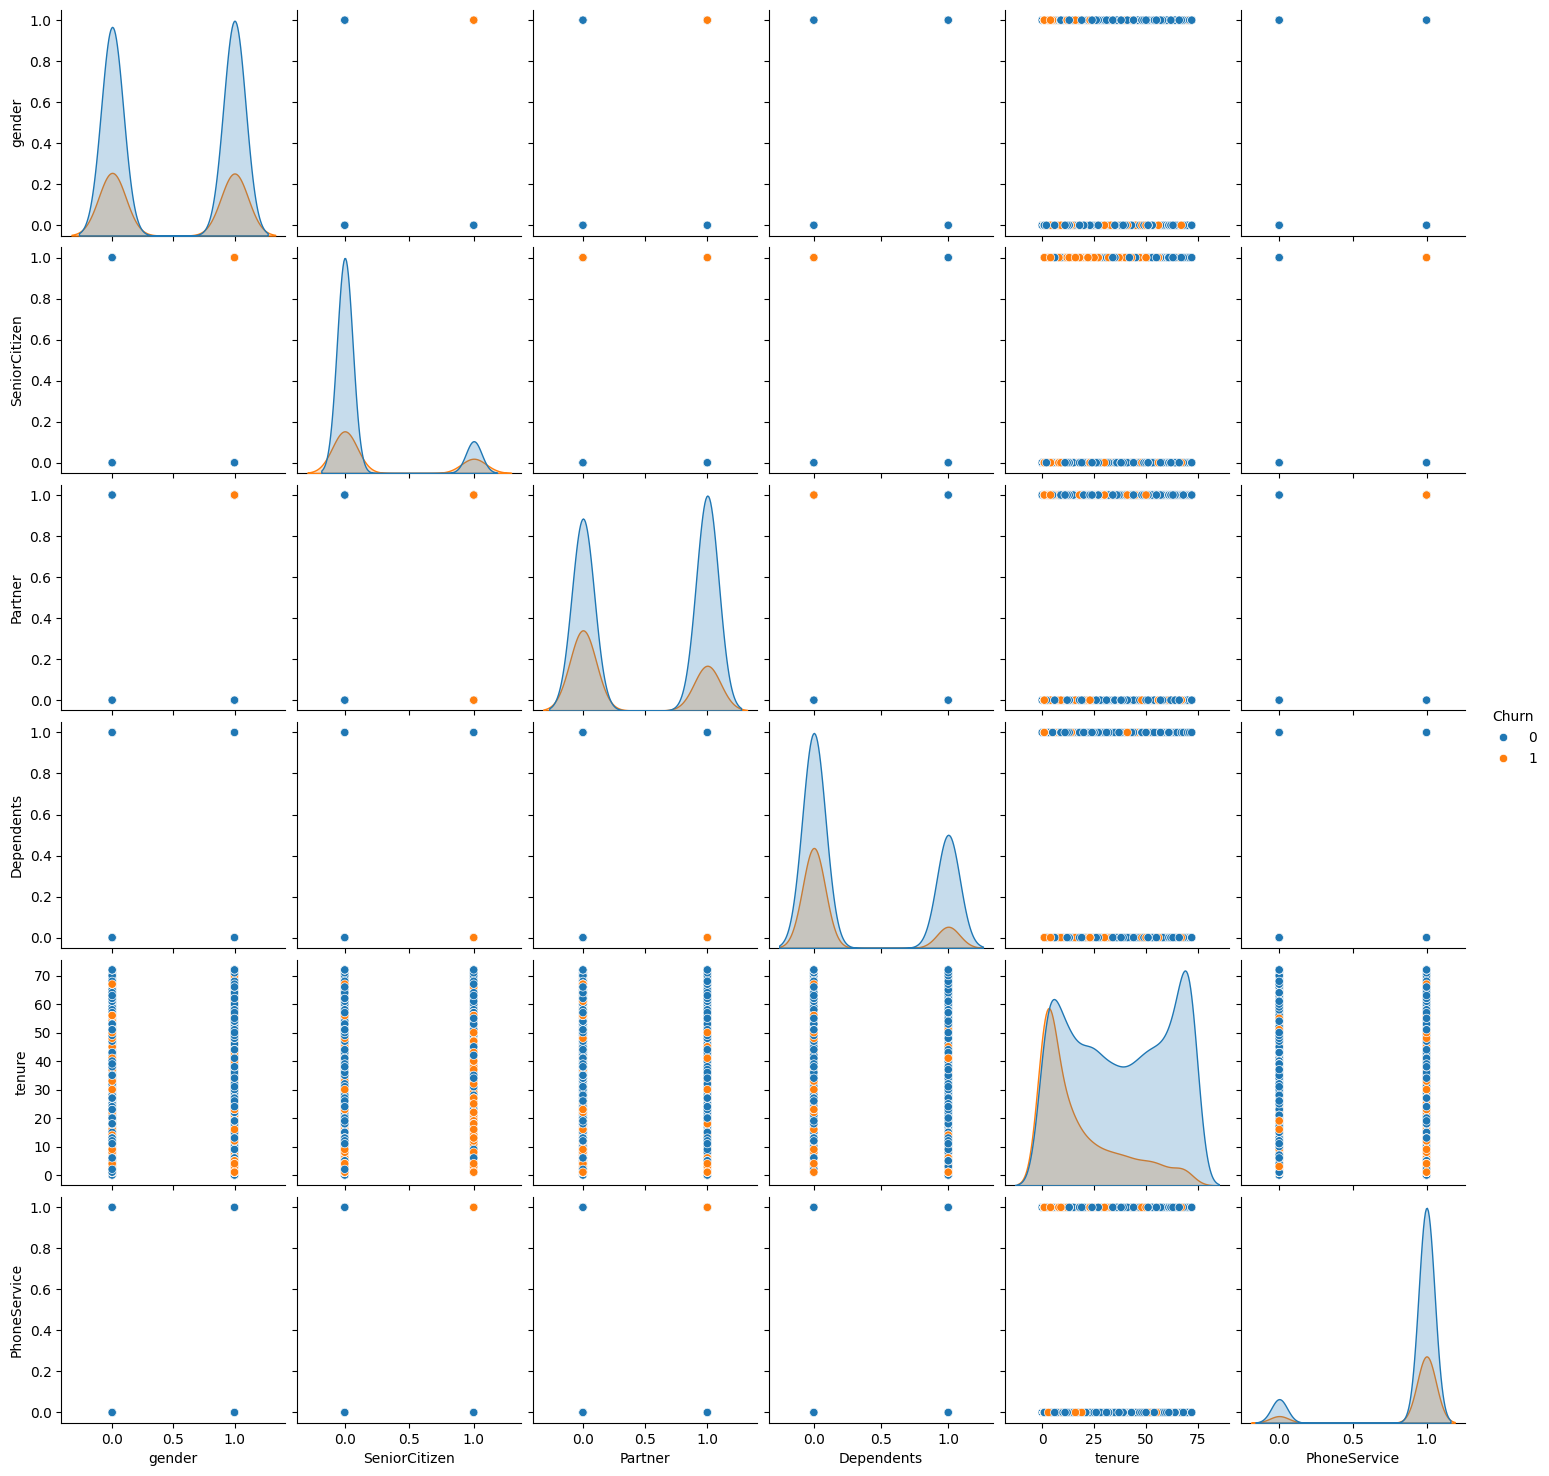

In [45]:
sns.pairplot(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure', 'PhoneService','Churn']],hue='Churn')
plt.show()

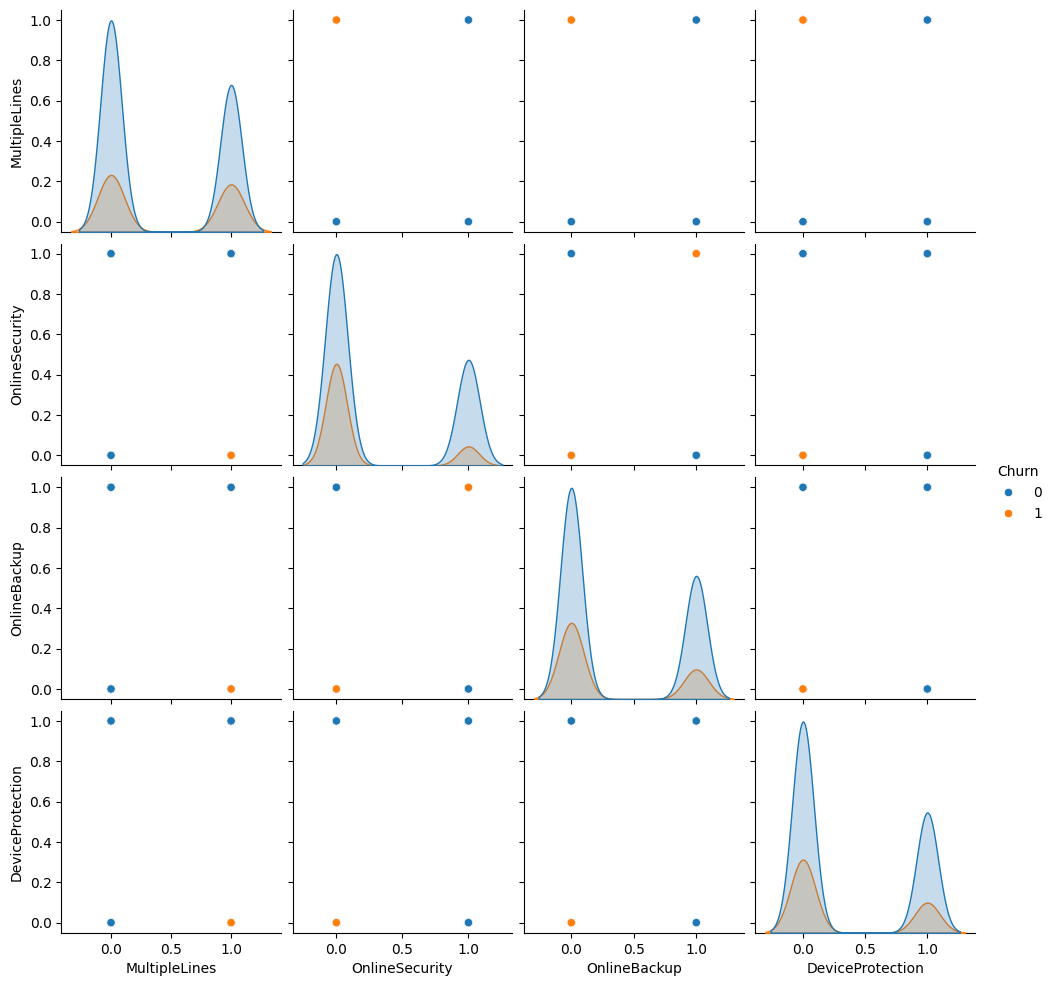

In [46]:
sns.pairplot(df[['MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection','Churn']],hue='Churn')
plt.show()

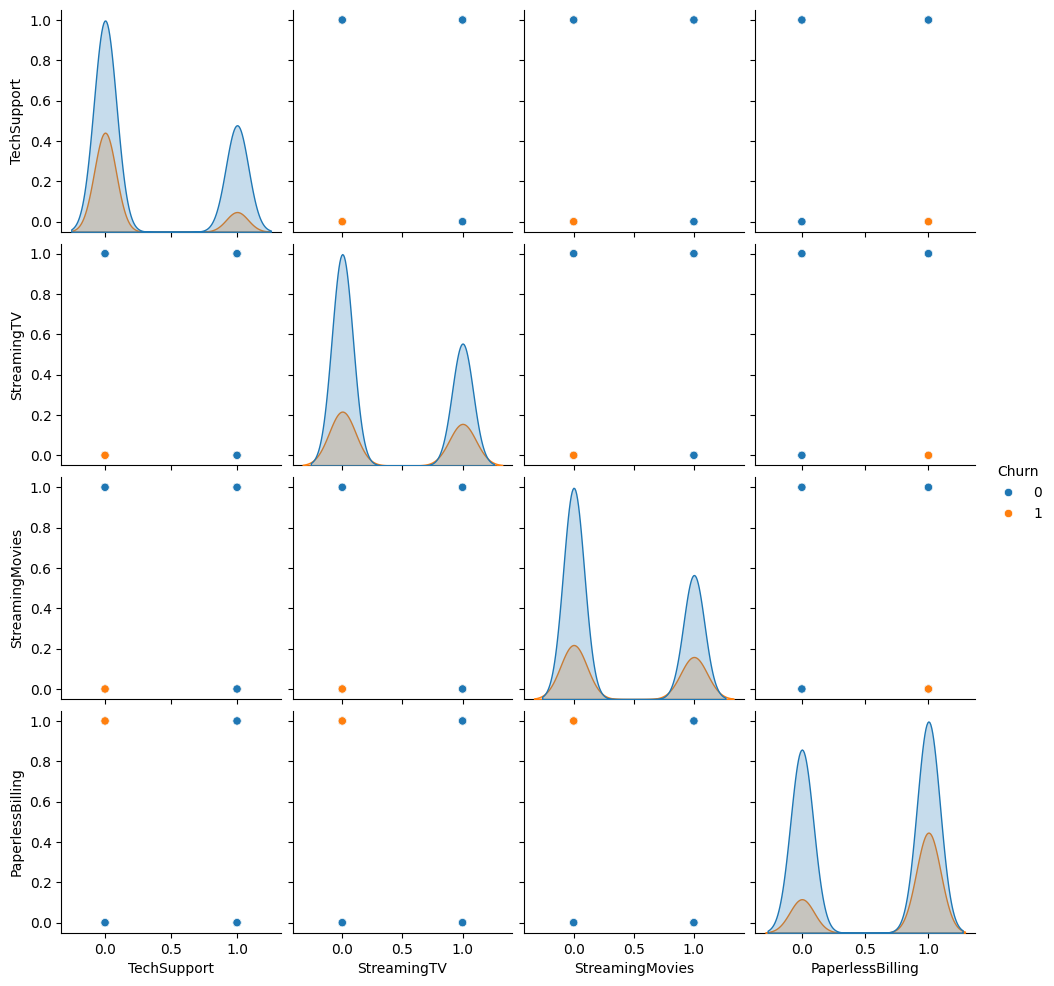

In [47]:
sns.pairplot(df[['TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','Churn']],hue='Churn')
plt.show()

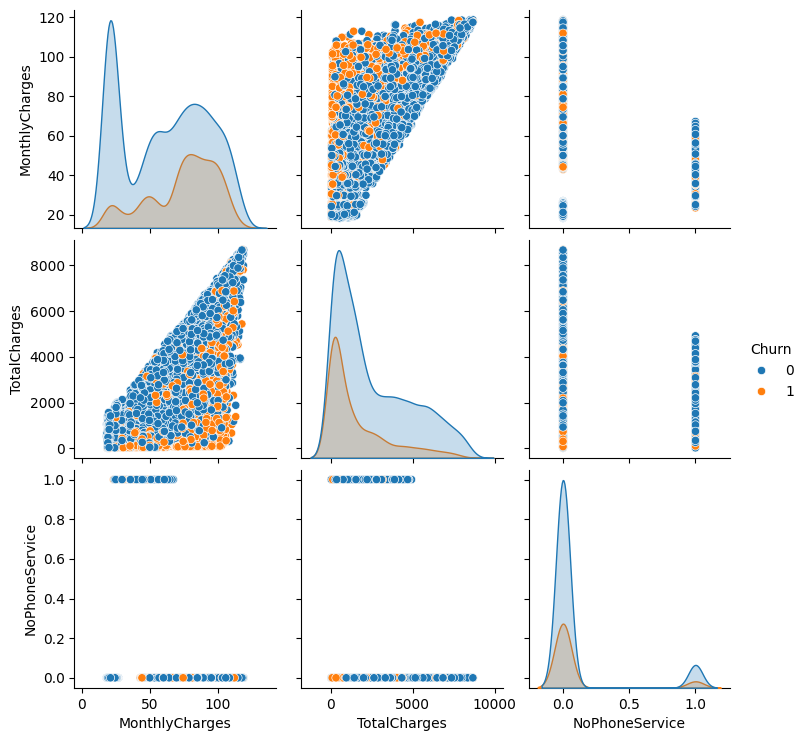

In [48]:
sns.pairplot(df[['PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn','NoPhoneService']],hue='Churn')
plt.show()

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [50]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [51]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [52]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [53]:
cate_col = ['InternetService','Contract','PaymentMethod']

In [54]:
nume_col = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [55]:
boolean_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
               'gender', 'Partner', 'Dependents', 'PhoneService','PaperlessBilling']

In [56]:
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [57]:
boolean_pipeline = Pipeline(steps=[
    ('encoder', FunctionTransformer(lambda x: x.astype(int)))
])

In [58]:
preprocessor = ColumnTransformer(
    transformers = [
        ('num', numerical_transformer, nume_col),
        ('cat', categorical_transformer, cate_col),
        ('bool', boolean_pipeline, boolean_cols)
    ]
)

In [59]:
x = df.drop(['Churn','customerID'],axis=1)
y = df['Churn']

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### logistic regression

In [61]:
lr = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier',LogisticRegression(random_state=42))
])

In [62]:
lr.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['InternetService',
                                                   'Contract',
                                                   'PaymentMethod']),
                                                 ('bool',
                                                  Pipeline(steps=[('encoder',
                                                                   FunctionTransformer(func=<function <lambda> at 0x00000239A95D3E20>))]),
                                                  ['OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies', 'gender',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'PaperlessBilling'])])),
                ('classifier', LogisticRegression(random_state=42))])

In [63]:
y_pred = lr.predict(x_test)

In [64]:
print(f'Accuracy Score : ',accuracy_score(y_test,y_pred))
print('Classification report :')
print(classification_report(y_test,y_pred))

Accuracy Score :  0.8204400283889283
Classification report :
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



## Decision Tree

In [65]:
dt = Pipeline(steps = [
    ('preprocesssor',preprocessor),
    ('classifier',DecisionTreeClassifier(random_state =42))
])

In [66]:
dt.fit(x_train, y_train)

Pipeline(steps=[('preprocesssor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['InternetService',
                                                   'Contract',
                                                   'PaymentMethod']),
                                                 ('bool',
                                                  Pipeline(steps=[('encoder',
                                                                   FunctionTransformer(func=<function <lambda> at 0x00000239A95D3E20>))]),
                                                  ['OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies', 'gender',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'PaperlessBilling'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [67]:
y_pred = dt.predict(x_test)

In [68]:
print(f'Accuracy score : ',accuracy_score(y_test,y_pred))
print('classification report')
print(classification_report(y_test,y_pred))

Accuracy score :  0.7345635202271115
classification report
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1036
           1       0.50      0.51      0.50       373

    accuracy                           0.73      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.74      0.73      0.74      1409



### Random forest

In [69]:
rf = Pipeline(steps = [
    ('preprocesssor',preprocessor),
    ('classifier',RandomForestClassifier(random_state =42))
])

In [70]:
rf.fit(x_train,y_train)

Pipeline(steps=[('preprocesssor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['InternetService',
                                                   'Contract',
                                                   'PaymentMethod']),
                                                 ('bool',
                                                  Pipeline(steps=[('encoder',
                                                                   FunctionTransformer(func=<function <lambda> at 0x00000239A95D3E20>))]),
                                                  ['OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies', 'gender',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'PaperlessBilling'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [71]:
y_pred = rf.predict(x_test)

In [72]:
print(f'Accuracy score : ',accuracy_score(y_test,y_pred))
print('classification report')
print(classification_report(y_test,y_pred))

Accuracy score :  0.7934705464868701
classification report
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1036
           1       0.64      0.50      0.56       373

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



### SVM

In [73]:
svm = Pipeline(steps = [
    ('preprocesssor',preprocessor),
    ('classifier',SVC(kernel='rbf', random_state=42))
])

In [74]:
svm.fit(x_train,y_train)

Pipeline(steps=[('preprocesssor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['InternetService',
                                                   'Contract',
                                                   'PaymentMethod']),
                                                 ('bool',
                                                  Pipeline(steps=[('encoder',
                                                                   FunctionTransformer(func=<function <lambda> at 0x00000239A95D3E20>))]),
                                                  ['OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies', 'gender',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'PaperlessBilling'])])),
                ('classifier', SVC(random_state=42))])

In [75]:
y_pred = svm.predict(x_test)

In [76]:
print(f'Accuracy score : ',accuracy_score(y_test,y_pred))
print('classification report')
print(classification_report(y_test,y_pred))

Accuracy score :  0.8112136266855926
classification report
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.51      0.59       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



### Adaboost classifier

In [77]:
ada_c = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=42)

In [78]:
ada = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', ada_c)
])

In [79]:
rf.fit(x_train,y_train)

Pipeline(steps=[('preprocesssor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['InternetService',
                                                   'Contract',
                                                   'PaymentMethod']),
                                                 ('bool',
                                                  Pipeline(steps=[('encoder',
                                                                   FunctionTransformer(func=<function <lambda> at 0x00000239A95D3E20>))]),
                                                  ['OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies', 'gender',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'PaperlessBilling'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [80]:
y_pred = rf.predict(x_test)

In [81]:
print(f'Accuracy score : ',accuracy_score(y_test,y_pred))
print('classification report')
print(classification_report(y_test,y_pred))

Accuracy score :  0.7934705464868701
classification report
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1036
           1       0.64      0.50      0.56       373

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



### Logistic Regression – GridSearchCV

In [82]:
lr_params = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l2'],
    'classifier__solver': ['liblinear', 'lbfgs']
}

lr_grid = GridSearchCV(lr, lr_params, cv=5, scoring='accuracy')
lr_grid.fit(x_train, y_train)

print("Best Logistic Regression Params:", lr_grid.best_params_)
print("Best Accuracy:", lr_grid.best_score_)


Best Logistic Regression Params: {'classifier__C': 1, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best Accuracy: 0.8003189908290136


### Decision Tree – GridSearchCV

In [83]:
dt_params = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10]
}

dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='accuracy')
dt_grid.fit(x_train, y_train)

print("Best Decision Tree Params:", dt_grid.best_params_)
print("Best Accuracy:", dt_grid.best_score_)

Best Decision Tree Params: {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__min_samples_split': 10}
Best Accuracy: 0.7671308634659363


### Random forest – GridSearchCV

In [84]:
rf_params = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__criterion': ['gini', 'entropy']
}

rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy')
rf_grid.fit(x_train, y_train)

print("Best Random Forest Params:", rf_grid.best_params_)
print("Best Accuracy:", rf_grid.best_score_)

Best Random Forest Params: {'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Best Accuracy: 0.8022701303859254


### SVM – GridSearchCV

In [85]:
svm_params = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf'],
    'classifier__gamma': ['scale', 'auto']
}

svm_grid = GridSearchCV(svm, svm_params, cv=5, scoring='accuracy')
svm_grid.fit(x_train, y_train)

print("Best SVM Params:", svm_grid.best_params_)
print("Best Accuracy:", svm_grid.best_score_)

Best SVM Params: {'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Best Accuracy: 0.7967700602520721


### adaboost – GridSearchCV

In [86]:
ada_params = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.5, 1.0, 1.5]
}

ada_grid = GridSearchCV(ada, ada_params, cv=5, scoring='accuracy')
ada_grid.fit(x_train, y_train)

print("Best AdaBoost Params:", ada_grid.best_params_)
print("Best Accuracy:", ada_grid.best_score_)

Best AdaBoost Params: {'classifier__learning_rate': 1.0, 'classifier__n_estimators': 100}
Best Accuracy: 0.7988988197024118


In [87]:
def evaluate_model(name, model):
    print(f"\n--- {name} Evaluation ---")
    y_pred = model.predict(x_test)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [88]:
evaluate_model("Logistic Regression", lr_grid.best_estimator_)
evaluate_model("Decision Tree", dt_grid.best_estimator_)
evaluate_model("Random Forest", rf_grid.best_estimator_)
evaluate_model("SVM", svm_grid.best_estimator_)
evaluate_model("AdaBoost", ada_grid.best_estimator_)


--- Logistic Regression Evaluation ---
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.61      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409

Confusion Matrix:
 [[932 104]
 [147 226]]

--- Decision Tree Evaluation ---
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1036
           1       0.63      0.48      0.55       373

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.79      0.78      1409

Confusion Matrix:
 [[929 107]
 [193 180]]

--- Random Forest Evaluation ---
Classification Report:
               precision    recall  f1-score   support

           0       0.84    

### logistic regression

In [89]:
lr_predictions = lr_grid.predict(x_test)

lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)
lr_f1 = f1_score(y_test, lr_predictions)

### decision tree

In [90]:
dt_predictions = dt_grid.predict(x_test)  

dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)
dt_f1 = f1_score(y_test, dt_predictions)

### random forest

In [91]:
rf_predictions = rf_grid.predict(x_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

### SVM

In [92]:
svc_predictions = svm_grid.predict(x_test)

svc_accuracy = accuracy_score(y_test, svc_predictions)
svc_precision = precision_score(y_test, svc_predictions)
svc_recall = recall_score(y_test, svc_predictions)
svc_f1 = f1_score(y_test, svc_predictions)

### AdaBoost 

In [93]:
ada_predictions = ada_grid.predict(x_test)

ada_accuracy = accuracy_score(y_test, ada_predictions)
ada_precision = precision_score(y_test, ada_predictions)
ada_recall = recall_score(y_test, ada_predictions)
ada_f1 = f1_score(y_test, ada_predictions)

### comparision between model

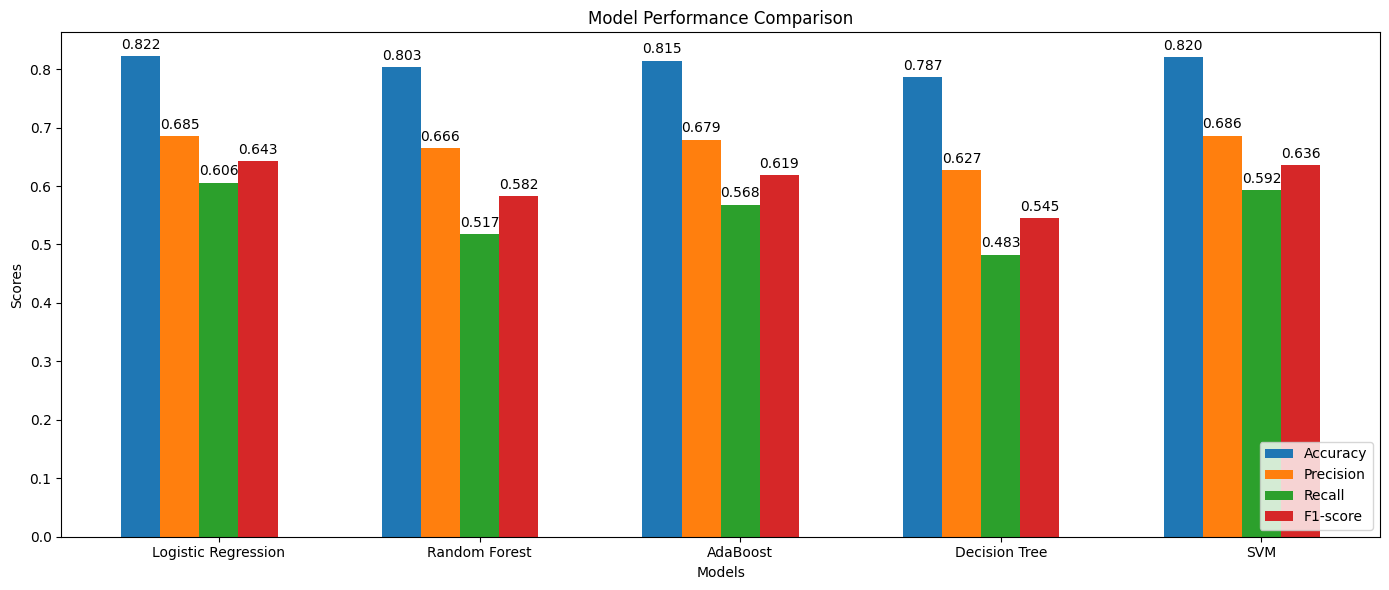

In [94]:
models = ['Logistic Regression', 'Random Forest', 'AdaBoost', 'Decision Tree', 'SVM']

final_accuracy = [lr_accuracy, rf_accuracy, ada_accuracy, dt_accuracy, svc_accuracy]
final_precision = [lr_precision, rf_precision, ada_precision, dt_precision, svc_precision]
final_recall = [lr_recall, rf_recall, ada_recall, dt_recall, svc_recall]
final_f1_score = [lr_f1, rf_f1, ada_f1, dt_f1, svc_f1]

bar_width = 0.15

r1 = np.arange(len(models))
r2 = r1 + bar_width
r3 = r2 + bar_width
r4 = r3 + bar_width
r5 = r4 + bar_width

fig, ax = plt.subplots(figsize=(14, 6))

bars1 = ax.bar(r1, final_accuracy, bar_width, label='Accuracy')
bars2 = ax.bar(r2, final_precision, bar_width, label='Precision')
bars3 = ax.bar(r3, final_recall, bar_width, label='Recall')
bars4 = ax.bar(r4, final_f1_score, bar_width, label='F1-score')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(r1 + 2 * bar_width)
ax.set_xticklabels(models)
ax.legend(loc='lower right')

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

for bars in [bars1, bars2, bars3, bars4]:
    autolabel(bars)

plt.tight_layout()
plt.show()


### so we select final model as logistic regression

video link - https://drive.google.com/file/d/1CDGt2GVzmjLem-lMXCzWy9Dm_k4tIup7/view?usp=sharing